In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv
/kaggle/input/yourallmodelsdata/submission_3_0.9471.csv
/kaggle/input/yourallmodelsdata/submission_4_0.9471.csv
/kaggle/input/yourallmodelsdata/submission_2_0.9471.csv
/kaggle/input/yourallmodelsdata/submission_1_0.9471.csv
/kaggle/input/yourallmodelsdata/submission_5_0.9471.csv


In [2]:
train_identity=pd.read_csv('../input/ieee-fraud-detection/train_identity.csv')
train_transaction=pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')
test_identity=pd.read_csv('../input/ieee-fraud-detection/test_identity.csv')
test_transaction=pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv')

In [3]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [4]:
test_transaction.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=393)

In [5]:
train_identity.shape

(144233, 41)

In [6]:
test_identity.shape

(141907, 41)

In [7]:
train_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


# Train-data stuff

In [8]:
train_transaction.shape

(590540, 394)

In [9]:
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train_transaction.drop(['TransactionID','ProductCD'],axis=1,inplace=True)

In [11]:
y=train_transaction.iloc[:,0]
train_transaction.drop(columns='isFraud',inplace=True)
y

0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

In [12]:
train_transaction.isnull().sum()

TransactionDT          0
TransactionAmt         0
card1                  0
card2               8933
card3               1565
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 391, dtype: int64

* **Columns which have more than 50% null values**

In [13]:
d=[]
n=(train_transaction.isnull().sum()/506691)*100
for i,j in enumerate(n):
  if(j>50):
    d.append(i)
    print(i)

10
11
13
29
30
32
33
34
35
36
38
39
40
41
43
44
45
46
47
49
50
51
52
53
54
55
56
57
58
59
60
61
62
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390


In [14]:
fields=train_transaction.columns[d]
fields=np.array(fields)
train_transaction.drop(columns=fields,inplace=True)

In [15]:
train_transaction.shape

(590540, 199)

In [16]:
train_transaction.fillna(train_transaction.mean(),inplace=True)

In [17]:
train_transaction.isnull().sum()[train_transaction.isnull().sum()>0]

card4              1577
card6              1571
P_emaildomain     94456
M6               169360
dtype: int64

* **Our  categorical data still have null values**

* **Filling the null values**

In [18]:
print("Before filling: \n"+str(train_transaction.card4.value_counts(normalize=True)*100))
train_transaction.card4.fillna('visa',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.card4.value_counts(normalize=True)*100))

Before filling: 
visa                65.329571
mastercard          32.127146
american express     1.414011
discover             1.129273
Name: card4, dtype: float64

*** 

After filling: 
visa                65.422156
mastercard          32.041352
american express     1.410235
discover             1.126257
Name: card4, dtype: float64


In [19]:
print("Before filling: \n"+str(train_transaction.card6.value_counts(normalize=True)*100))
train_transaction.card6.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.card6.value_counts(normalize=True)*100))

Before filling: 
debit              74.696291
credit             25.296068
debit or credit     0.005094
charge card         0.002547
Name: card6, dtype: float64

*** 

After filling: 
debit              74.641345
credit             25.351035
debit or credit     0.005080
charge card         0.002540
Name: card6, dtype: float64


In [20]:
print("Before filling: \n"+str(train_transaction.P_emaildomain.value_counts(normalize=True)*100))
train_transaction.P_emaildomain.fillna('gmail.com',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.P_emaildomain.value_counts(normalize=True)*100))

Before filling: 
gmail.com           46.031519
yahoo.com           20.346151
hotmail.com          9.121439
anonymous.com        7.458011
aol.com              5.702462
comcast.net          1.590053
icloud.com           1.263294
outlook.com          1.027245
msn.com              0.824860
att.net              0.812967
live.com             0.613001
sbcglobal.net        0.598689
verizon.net          0.545271
ymail.com            0.482983
bellsouth.net        0.384814
yahoo.com.mx         0.311036
me.com               0.306803
cox.net              0.280799
optonline.net        0.203796
charter.net          0.164488
live.com.mx          0.150982
rocketmail.com       0.133848
mail.com             0.112683
earthlink.net        0.103611
gmail                0.099983
outlook.es           0.088291
mac.com              0.087888
juno.com             0.064908
aim.com              0.063497
windstream.net       0.061482
hotmail.es           0.061482
roadrunner.com       0.061482
hotmail.fr           0.

In [21]:
print("Before filling: \n"+str(train_transaction.M6.value_counts(normalize=True)*100))
train_transaction.M6.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(train_transaction.M6.value_counts(normalize=True)*100))

Before filling: 
F    54.099435
T    45.900565
Name: M6, dtype: float64

*** 

After filling: 
F    54.069157
T    45.930843
Name: M6, dtype: float64


In [22]:
train_transaction.isnull().sum()[train_transaction.isnull().sum()>0]

Series([], dtype: int64)

In [23]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

card4=pd.Series(label_encoder.fit_transform(train_transaction.card4))
card6=pd.Series(label_encoder.fit_transform(train_transaction.card6))
P_emaildomain=pd.Series(label_encoder.fit_transform(train_transaction.P_emaildomain))
M6=pd.Series(label_encoder.fit_transform(train_transaction.M6))

train_transaction.drop(['card4','card6','M6','P_emaildomain'], axis=1,inplace=True)

In [24]:
card4=pd.DataFrame(card4,columns=['card4'])
card6=pd.DataFrame(card6,columns=['card6'])
M6=pd.DataFrame(M6,columns=['M6'])
P_emaildomain=pd.DataFrame(P_emaildomain,columns=['P_emaildomain'])

train_transaction=pd.concat([train_transaction,card4,card6,M6,P_emaildomain],axis=1)

In [25]:
train_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V316,V317,V318,V319,V320,V321,card4,card6,M6,P_emaildomain
0,86400,68.50,13926,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,...,0.0,117.0,0.0,0.000000,0.000000,0.000000,1,1,1,16
1,86401,29.00,2755,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,1,1,16
2,86469,59.00,4663,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,3,2,0,35
3,86499,50.00,18132,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,...,50.0,1404.0,790.0,0.000000,0.000000,0.000000,2,2,0,53
4,86506,50.00,4497,514.000000,150.0,102.0,420.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,1,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,15811047,49.00,6550,362.555488,150.0,226.0,272.0,87.0,2.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,3,2,0,16
590536,15811049,39.50,10444,225.000000,150.0,224.0,204.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,2,1,16
590537,15811079,30.95,12037,595.000000,150.0,224.0,231.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,2,1,16
590538,15811088,117.00,7826,481.000000,150.0,224.0,387.0,87.0,1.0,1.0,...,0.0,2234.0,0.0,0.000000,0.000000,0.000000,2,2,1,2


In [26]:
normalized = preprocessing.normalize(train_transaction)

In [27]:
train_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V316,V317,V318,V319,V320,V321,card4,card6,M6,P_emaildomain
0,86400,68.50,13926,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,...,0.0,117.0,0.0,0.000000,0.000000,0.000000,1,1,1,16
1,86401,29.00,2755,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,1,1,16
2,86469,59.00,4663,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,3,2,0,35
3,86499,50.00,18132,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,...,50.0,1404.0,790.0,0.000000,0.000000,0.000000,2,2,0,53
4,86506,50.00,4497,514.000000,150.0,102.0,420.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,1,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,15811047,49.00,6550,362.555488,150.0,226.0,272.0,87.0,2.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,3,2,0,16
590536,15811049,39.50,10444,225.000000,150.0,224.0,204.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,2,1,16
590537,15811079,30.95,12037,595.000000,150.0,224.0,231.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,2,1,16
590538,15811088,117.00,7826,481.000000,150.0,224.0,387.0,87.0,1.0,1.0,...,0.0,2234.0,0.0,0.000000,0.000000,0.000000,2,2,1,2


# Test-data stuff

In [28]:
test_transaction.shape

(506691, 393)

In [29]:
test_transaction

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
test_transaction.drop(['TransactionID','ProductCD'],axis=1,inplace=True)

* We delete the same columns as we deleted in the test_transaction

In [31]:
fields=test_transaction.columns[d]
fields=np.array(fields)
test_transaction.drop(columns=fields,inplace=True)

In [32]:
test_transaction.shape

(506691, 199)

In [33]:
n=(train_transaction.isnull().sum()/506691)*100
for i,j in enumerate(n):
  if(j>50):
    print(i)
  else:
    print('Nothing left.')
    break

Nothing left.


### Conclusion: the same fields as train_transaction had more than 50% null values

In [34]:
test_transaction.fillna(test_transaction.mean(),inplace=True)

In [35]:
test_transaction.isnull().sum()[test_transaction.isnull().sum()>0]

card4              3086
card6              3007
P_emaildomain     69192
M6               158939
dtype: int64

In [36]:
print("Before filling: \n"+str(test_transaction.card4.value_counts(normalize=True)*100))
test_transaction.card4.fillna('visa',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.card4.value_counts(normalize=True)*100))

Before filling: 
visa                66.496957
mastercard          31.407353
american express     1.525203
discover             0.570487
Name: card4, dtype: float64

*** 

After filling: 
visa                66.701007
mastercard          31.216067
american express     1.515914
discover             0.567012
Name: card4, dtype: float64


In [37]:
print("Before filling: \n"+str(test_transaction.card6.value_counts(normalize=True)*100))
test_transaction.card6.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.card6.value_counts(normalize=True)*100))

Before filling: 
debit          76.440983
credit         23.558819
charge card     0.000199
Name: card6, dtype: float64

*** 

After filling: 
debit          76.123515
credit         23.876288
charge card     0.000197
Name: card6, dtype: float64


In [38]:
print("Before filling: \n"+str(test_transaction.P_emaildomain.value_counts(normalize=True)*100))
test_transaction.P_emaildomain.fillna('gmail.com',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.P_emaildomain.value_counts(normalize=True)*100))

Before filling: 
gmail.com           47.416794
yahoo.com           18.708614
hotmail.com          9.234078
anonymous.com        7.786075
aol.com              5.496698
comcast.net          1.505375
icloud.com           1.382632
outlook.com          1.105831
att.net              0.826059
msn.com              0.774402
sbcglobal.net        0.639316
live.com             0.612344
verizon.net          0.527087
ymail.com            0.383772
bellsouth.net        0.349258
yahoo.com.mx         0.293486
cox.net              0.288915
me.com               0.272229
optonline.net        0.211658
live.com.mx          0.164800
charter.net          0.143315
mail.com             0.136457
gmail                0.113600
earthlink.net        0.106286
rocketmail.com       0.100800
mac.com              0.097372
outlook.es           0.097143
hotmail.fr           0.086629
hotmail.es           0.073600
frontier.com         0.071772
roadrunner.com       0.063543
web.de               0.063543
juno.com             0.

In [39]:
print("Before filling: \n"+str(test_transaction.M6.value_counts(normalize=True)*100))
test_transaction.M6.fillna(method='ffill',inplace=True)
print("\n*** \n\nAfter filling: \n"+str(test_transaction.M6.value_counts(normalize=True)*100))

Before filling: 
F    55.090122
T    44.909878
Name: M6, dtype: float64

*** 

After filling: 
F    55.153338
T    44.846662
Name: M6, dtype: float64


In [40]:
test_transaction.isnull().sum()[test_transaction.isnull().sum()>0]

Series([], dtype: int64)

In [41]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

card4=pd.Series(label_encoder.fit_transform(test_transaction.card4))
card6=pd.Series(label_encoder.fit_transform(test_transaction.card6))
P_emaildomain=pd.Series(label_encoder.fit_transform(test_transaction.P_emaildomain))
M6=pd.Series(label_encoder.fit_transform(test_transaction.M6))

test_transaction.drop(['card4','card6','M6','P_emaildomain'], axis=1,inplace=True)

In [42]:
card4=pd.DataFrame(card4,columns=['card4'])
card6=pd.DataFrame(card6,columns=['card6'])
M6=pd.DataFrame(M6,columns=['M6'])
P_emaildomain=pd.DataFrame(P_emaildomain,columns=['P_emaildomain'])

test_transaction=pd.concat([test_transaction,card4,card6,M6,P_emaildomain],axis=1)

In [43]:
normalized = preprocessing.normalize(test_transaction)

In [44]:
test_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V316,V317,V318,V319,V320,V321,card4,card6,M6,P_emaildomain
0,18403224,31.950,10409,111.0,150.0,226.0,170.000000,87.000000,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0,16
1,18403263,49.000,4272,111.0,150.0,226.0,299.000000,87.000000,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0,2
2,18403310,171.000,4476,574.0,150.0,226.0,472.000000,87.000000,2.0,2.0,...,0.0,0.0,0.0,0.0,263.0,0.0,3,2,0,19
3,18403310,284.950,10989,360.0,150.0,166.0,205.000000,87.000000,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2,1,16
4,18403317,67.950,18018,452.0,150.0,117.0,264.000000,87.000000,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.679,13832,375.0,185.0,224.0,284.000000,60.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,2,1,16
506687,34214287,12.173,3154,408.0,185.0,224.0,291.846514,86.723412,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,2,1,19
506688,34214326,49.000,16661,490.0,150.0,226.0,327.000000,87.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0,19
506689,34214337,202.000,16621,516.0,150.0,224.0,177.000000,87.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0,19


# Model

In [45]:
from keras import Model
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import plot_model, to_categorical
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

In [46]:
lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=3, 
                       min_lr=1e-30)

In [47]:
encoder_input = Input(199,name = 'input_encoder')
encoder = Dense(1024, activation='relu',name = 'encoder_layer1')(encoder_input)
encoder = Dense(512, activation='relu',name = 'encoder_layer2')(encoder)
encoder = BatchNormalization(name = 'encoder_layer3')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer4')(encoder)
encoder = Dense(256, activation='relu',name = 'encoder_layer5')(encoder)
encoder = Dense(128, activation='relu',name = 'encoder_layer6')(encoder)
encoder = Dense(128, activation='relu',name = 'encoder_layer7')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer8')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer9')(encoder)
encoder_output = Dense(64, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
Encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 199)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 1024)              204800    
_________________________________________________________________
encoder_layer2 (Dense)       (None, 512)               524800    
_________________________________________________________________
encoder_layer3 (BatchNormali (None, 512)               2048      
_________________________________________________________________
encoder_layer4 (Dropout)     (None, 512)               0         
_________________________________________________________________
encoder_layer5 (Dense)       (None, 256)               131328    
_________________________________________________________________
encoder_layer6 (Dense)       (None, 128)               3289

In [48]:
decoder_input = Input(64,name = 'input_decoder')
decoder = Dense(64, activation='relu',name = 'decoder_layer1')(decoder_input)
decoder = Dense(64, activation='relu',name = 'decoder_layer2')(decoder)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.2 , name = 'decoder_layer4')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer6')(decoder)
decoder = Dense(256, activation='relu',name = 'decoder_layer7')(decoder)
decoder = Dense(512, activation='relu',name = 'decoder_layer8')(decoder)
decoder = Dense(1024, activation='relu',name = 'decoder_layer9')(decoder)
decoder_output = Dense(199,activation = 'relu',name ='output_layer')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
Decoder.summary()



Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 64)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 64)                4160      
_________________________________________________________________
decoder_layer2 (Dense)       (None, 64)                4160      
_________________________________________________________________
decoder_layer3 (BatchNormali (None, 64)                256       
_________________________________________________________________
decoder_layer4 (Dropout)     (None, 64)                0         
_________________________________________________________________
decoder_layer5 (Dense)       (None, 128)               8320      
_________________________________________________________________
decoder_layer6 (Dense)       (None, 128)               1651

In [49]:
autoencoder_input = Input(199,name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 199)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 64)                928960    
_________________________________________________________________
Decoder (Functional)         (None, 199)               927303    
Total params: 1,856,263
Trainable params: 1,855,111
Non-trainable params: 1,152
_________________________________________________________________


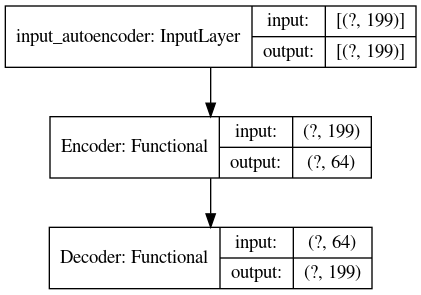

In [50]:
plot_model(autoencoder,show_shapes=True)

In [51]:
adam = Adam(lr=1e-20)
autoencoder.compile(optimizer=adam,loss='mae')

In [52]:

history = autoencoder.fit(train_transaction.iloc[ :10000 ,:],train_transaction.iloc[ :10000 ,:],
                          batch_size = 300,
                          validation_split = 0.2,
                          epochs= 100,
                          verbose=1,
                          callbacks=[lrr])

Epoch 1/100
27/27 [==============================] - 2s 58ms/step - loss: 903.8900 - val_loss: 1408.5178
Epoch 2/100
27/27 [==============================] - 1s 48ms/step - loss: 903.8901 - val_loss: 1408.5181
Epoch 3/100
27/27 [==============================] - 1s 47ms/step - loss: 903.8900 - val_loss: 1408.5181
Epoch 4/100
27/27 [==============================] - 1s 47ms/step - loss: 903.8901 - val_loss: 1408.5183
Epoch 5/100
27/27 [==============================] - 1s 47ms/step - loss: 903.8900 - val_loss: 1408.5183
Epoch 6/100
27/27 [==============================] - 1s 50ms/step - loss: 903.8901 - val_loss: 1408.5183
Epoch 7/100
27/27 [==============================] - 1s 48ms/step - loss: 903.8900 - val_loss: 1408.5184
Epoch 8/100
27/27 [==============================] - 1s 48ms/step - loss: 903.8901 - val_loss: 1408.5184
Epoch 9/100
27/27 [==============================] - 1s 48ms/step - loss: 903.8900 - val_loss: 1408.5184
Epoch 10/100
27/27 [==============================] - 1

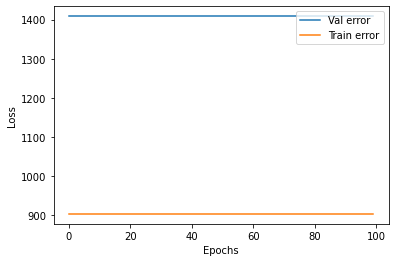

In [53]:
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

In [54]:
input_model = Input(64,name = 'input_layer')

classifier = Dense(64, activation='relu')(input_model)
classifier = Dense(32, activation='relu')(classifier)
output = Dense(2, activation='sigmoid')(classifier)

classifier = Model(inputs= [input_model], outputs=[output])
classifier.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 6,306
Trainable params: 6,306
Non-trainable params: 0
_________________________________________________________________


In [55]:
sgd=SGD(lr=0.0001, momentum=0.9)
classifier.compile(optimizer=sgd, loss='mae' , metrics=['accuracy'])

In [56]:
lrr=ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=2, 
                       min_lr=1e-8)

In [57]:
latent_vector=Encoder.predict(train_transaction[:10000])
history = classifier.fit(latent_vector ,y[:10000],
               batch_size = 128,
               validation_split = 0.2,
               epochs= 100,
               verbose=1,
               callbacks=[lrr]
               )

Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.0235 - val_loss: 0.4914 - val_accuracy: 0.0385
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.0235 - val_loss: 0.4862 - val_accuracy: 0.0385
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.0235 - val_loss: 0.4810 - val_accuracy: 0.0385
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.0236 - val_loss: 0.4758 - val_accuracy: 0.0385
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.0275 - val_loss: 0.4705 - val_accuracy: 0.0385
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.0381 - val_loss: 0.4651 - val_accuracy: 0.0385
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.0561 - val_loss: 0.4597 - val_accuracy: 0.0385
Epoch 8/100
6

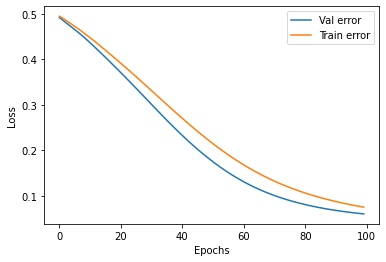

In [58]:
val_loss = history.history['val_loss']
loss = history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('classifier_plot_error.png')
plt.show()

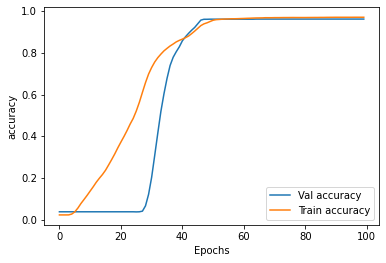

In [59]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig( 'classifier_plot_accuracy.png')
plt.show()

In [60]:
predicted_latentvec=Encoder.predict(test_transaction)
predicted=classifier.predict(predicted_latentvec)
predicted

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)